In [1]:
# edit
import warnings
warnings.filterwarnings(action= 'ignore')
#!pip install tensorflow

In [2]:
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\Kashi\Downloads\gas_turbines.csv')


In [4]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [5]:
df = df.drop(['TIT', 'CDP'], axis = 1)
df.head()

,AT,AP,AH,AFDP,GTEP,TAT,TEY,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,550.00,114.70,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,550.00,114.72,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,549.87,114.71,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,549.99,114.72,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,549.98,114.72,3.2484,82.311


In [6]:
x = df[['AT','AP','AH','AFDP','GTEP','TAT','CO','NOX']]
y = df['TEY']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [8]:
model = Sequential()
model.add(Dense(20, input_dim=8,  activation='relu')) #1st layer
model.add(Dense(10,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(1, activation='linear')) #4th layer or output layer

In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])


In [17]:
# Fit the model
history = model.fit(x, y, validation_split=0.2, epochs=30, batch_size=20)

Epoch 1/30
602/602 [==============================] - 5s 4ms/step - loss: 1.7937 - mean_absolute_error: 1.0001 - val_loss: 1.3704 - val_mean_absolute_error: 0.9188
Epoch 2/30
602/602 [==============================] - 4s 6ms/step - loss: 1.5142 - mean_absolute_error: 0.9329 - val_loss: 1.3544 - val_mean_absolute_error: 0.9243
Epoch 3/30
602/602 [==============================] - 4s 6ms/step - loss: 1.7924 - mean_absolute_error: 1.0347 - val_loss: 1.4898 - val_mean_absolute_error: 0.9194
Epoch 4/30
602/602 [==============================] - 4s 7ms/step - loss: 1.6263 - mean_absolute_error: 0.9770 - val_loss: 1.2521 - val_mean_absolute_error: 0.8562
Epoch 5/30
602/602 [==============================] - 2s 4ms/step - loss: 1.6416 - mean_absolute_error: 0.9779 - val_loss: 1.3487 - val_mean_absolute_error: 0.9214
Epoch 6/30
602/602 [==============================] - 4s 7ms/step - loss: 1.8107 - mean_absolute_error: 1.0266 - val_loss: 2.4653 - val_mean_absolute_error: 1.2776
Epoch 7/30
602/6

In [18]:
scores = model.evaluate(x, y)

470/470 [==============================] - 2s 5ms/step - loss: 1.8607 - mean_absolute_error: 1.0823


In [19]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

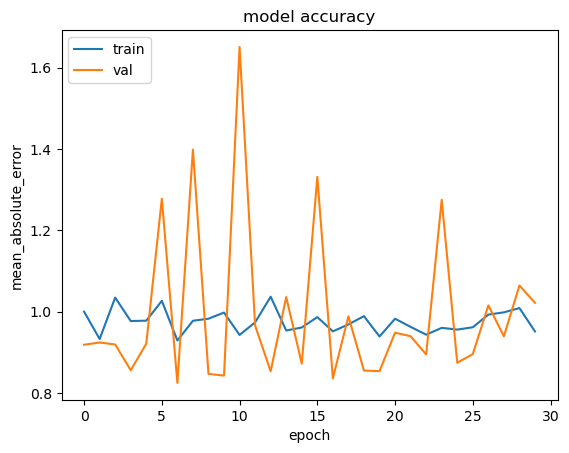

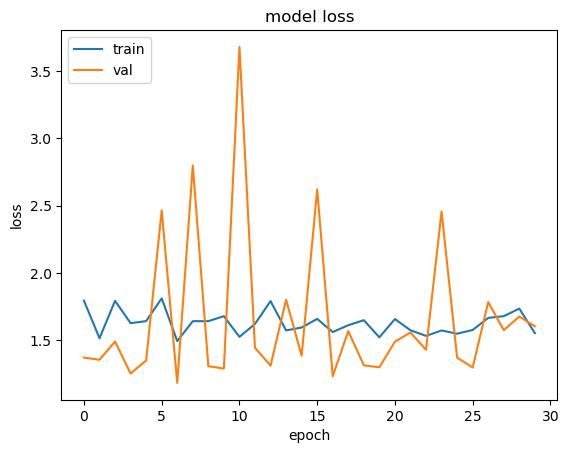

In [20]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()